In [1]:
import zipfile
import pandas as pd

In [2]:
with zipfile.ZipFile("1689942861_rolling_stones_spotify.zip", 'r') as zip_ref:
    zip_ref.extractall("spotify_data")

In [3]:
df = pd.read_csv("spotify_data/rolling_stones_spotify.csv")

In [4]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df_clean = df.drop(columns=['id', 'uri', 'name', 'album', 'release_date'])

In [8]:
df_clean.dropna(inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

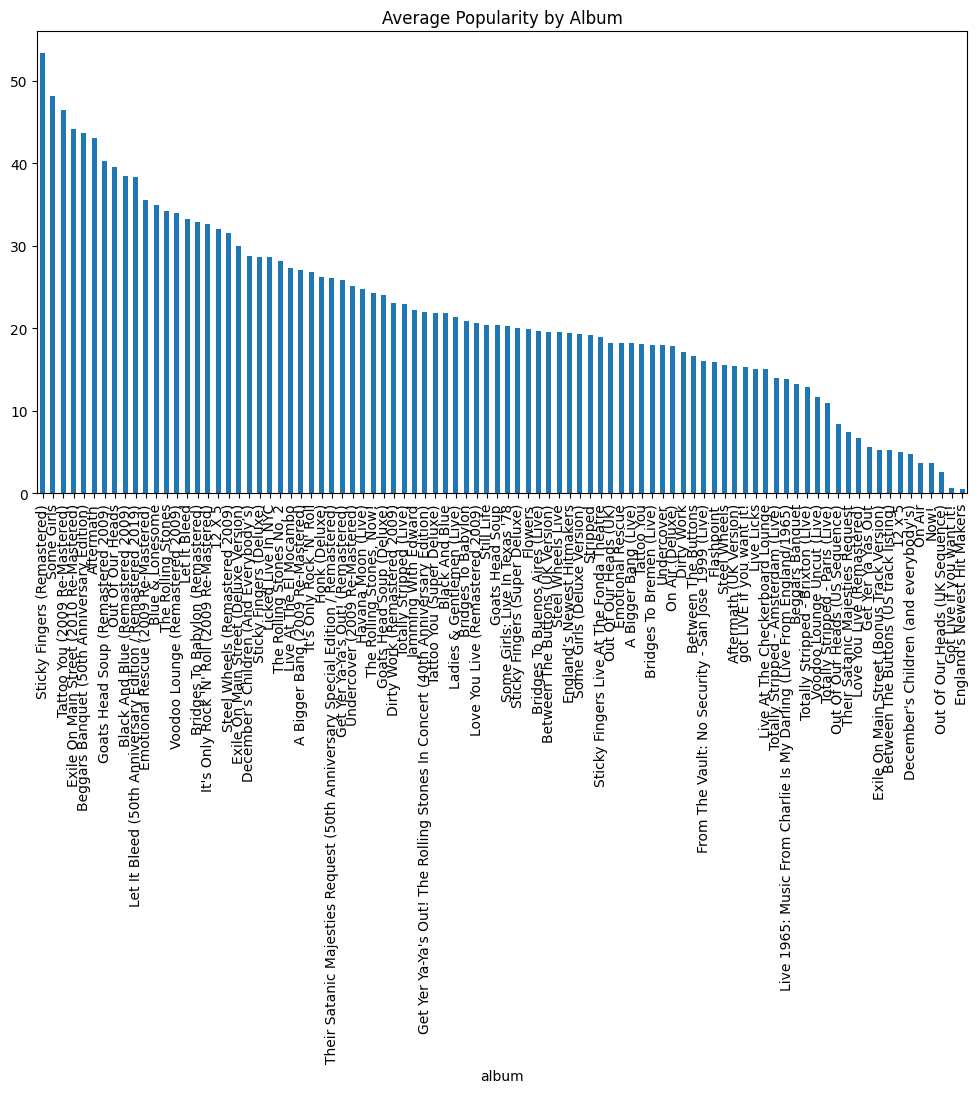

In [10]:
popular_albums = df.groupby("album")["popularity"].mean().sort_values(ascending=False)
popular_albums.plot(kind='bar', figsize=(12, 6), title='Average Popularity by Album')
plt.show()

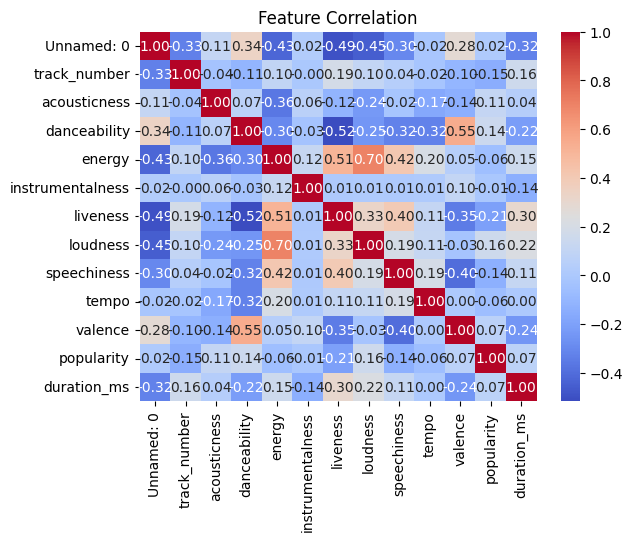

In [11]:
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

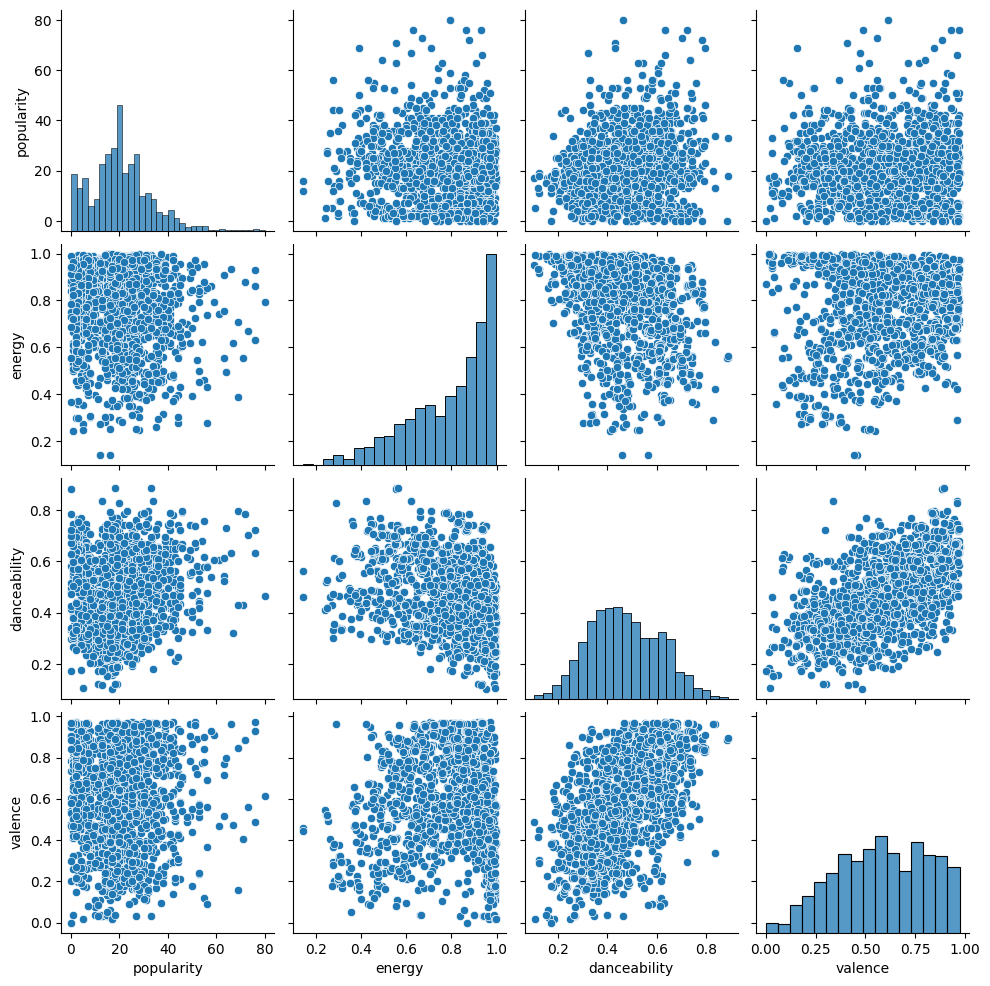

In [12]:
sns.pairplot(df[['popularity', 'energy', 'danceability', 'valence']])
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

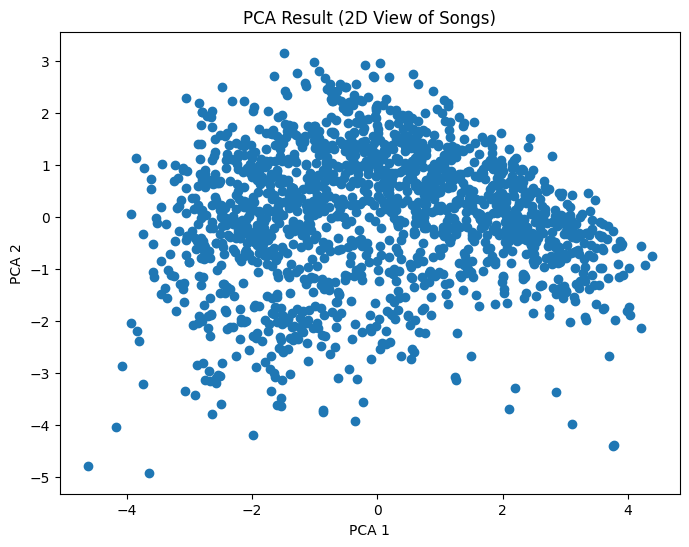

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("PCA Result (2D View of Songs)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [18]:
from sklearn.cluster import KMeans

In [19]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

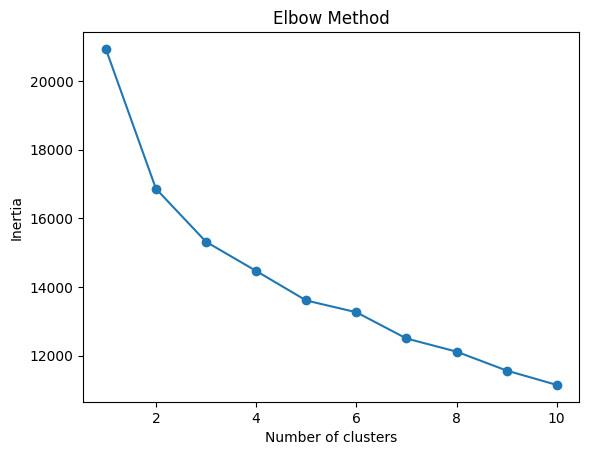

In [20]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [21]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

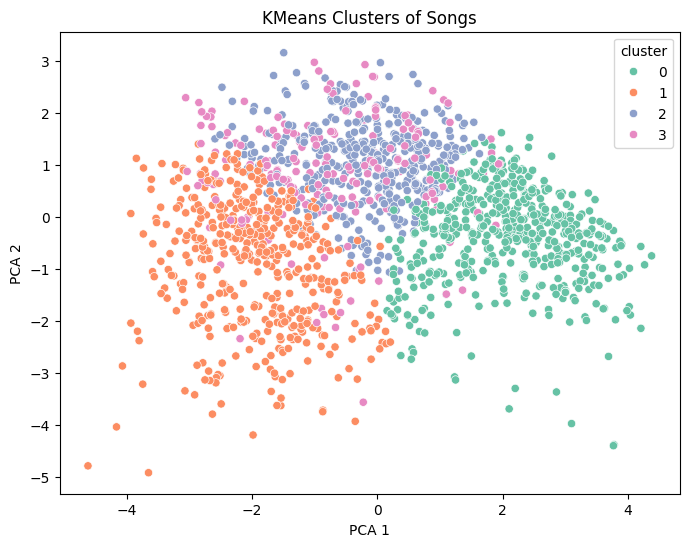

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['cluster'], palette='Set2')
plt.title("KMeans Clusters of Songs")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [23]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_clean.columns)
print("Cluster Characteristics:\n", centroids)

Cluster Characteristics:
     Unnamed: 0  track_number  acousticness  danceability    energy  \
0   450.632270     11.422139      0.216153      0.354664  0.908206   
1  1204.741071      7.102679      0.368515      0.538478  0.575911   
2   739.324009      7.216783      0.160042      0.520065  0.862317   
3   990.820000      7.510000      0.271511      0.507410  0.818355   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.120060  0.857941  -5.574683     0.106672  134.560462  0.427336   
1          0.055210  0.229203 -10.034757     0.047490  118.345478  0.567330   
2          0.061871  0.352418  -5.475676     0.054474  125.055117  0.725888   
3          0.745225  0.402662  -7.041790     0.052070  123.019640  0.719732   

   popularity    duration_ms  
0   17.243902  317279.936210  
1   20.613839  225204.477679  
2   25.221445  242472.165501  
3   21.115000  204666.875000  


In [24]:
df_final = df[['name', 'album', 'cluster']]
print(df_final.groupby("cluster").head(3)) 

                                               name  \
0                        Concert Intro Music - Live   
1                        Street Fighting Man - Live   
2                                Start Me Up - Live   
3                       If You Can't Rock Me - Live   
23   Honky Tonk Women - Live At The El Mocambo 1977   
25       Hand Of Fate - Live At The El Mocambo 1977   
26           Route 66 - Live At The El Mocambo 1977   
40     Rip This Joint - Live At The El Mocambo 1977   
66    Under My Thumb - Live at Wembley Stadium 1982   
100                        Heaven - Remastered 2021   
154                        Coming Down Again - 2020   
165                      100 Years Ago - Piano Demo   

                         album  cluster  
0           Licked Live In NYC        3  
1           Licked Live In NYC        0  
2           Licked Live In NYC        0  
3           Licked Live In NYC        0  
23      Live At The El Mocambo        2  
25      Live At The El Mocambo  